# Perceptron algorithm in Julia

This code and algorithm was explained in detail by Dr. Randy Davila. We will use the in-class code to test on our own dataset.

In [115]:
#import Pkg; Pkg.add("RDatasets")
using Pkg
using RDatasets
using Plots

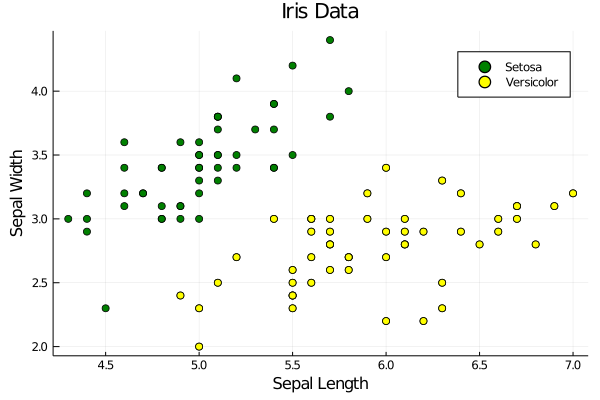

In [116]:
iris = dataset("datasets", "iris")

x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

#plot 
scatter(x_data[1:100], 
    label = "Setosa", 
    xaxis = "Sepal Length", 
    yaxis = "Sepal Width", 
    color = "green",
    title = "Iris Data")

scatter!(x_data[51:100],
    color = "yellow",
    label = "Versicolor")

In [117]:
function sign(weights, x)
    x̄ = [1.0, x[1], x[2]]
    return weights'x̄ > 0 ? 1 : -1
end

sign (generic function with 1 method)

In [118]:
function perceptron_update_rule(weights, x, y)
    if sign(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    
    return weights
end

perceptron_update_rule (generic function with 1 method)

In [119]:
function PLA(X, Y; epochs = 1000)
    w = randn(3)
    
    counter = 1
    while counter  < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        counter += 1
    end
    
    return w
end

PLA (generic function with 1 method)

In [120]:
w = PLA(x_data, y_data; epochs = 10000)

3-element Array{Float64,1}:
 121.94130554051277
 -78.33038474699293
 100.24458374563699

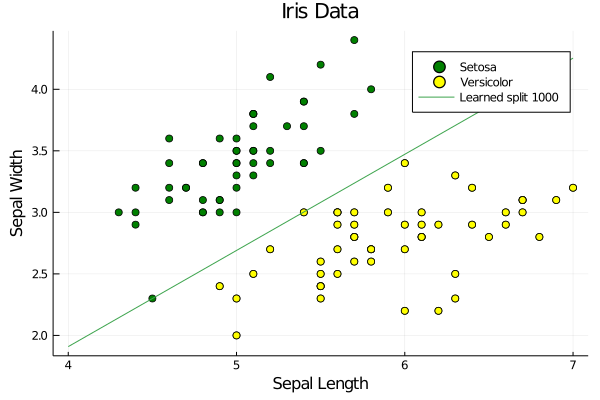

In [121]:
plot!([(x,(-w[2]*x - w[1]) / w[3]) for x = 4:7],
        label = "Learned split 1000")

In [122]:
function predictor(weights, x)
    return sign(weights, x) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

### Predict a different value from 1 to 100

In [123]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.SepalWidth[k])))

Flower #20
The true label is: setosa
The predicted label is: setosa


In [124]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.SepalWidth[k])))

Flower #46
The true label is: setosa
The predicted label is: setosa


In [125]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.SepalWidth[k])))

Flower #97
The true label is: versicolor
The predicted label is: versicolor


## Perceptron on different iris values: Petal length and Petal Width

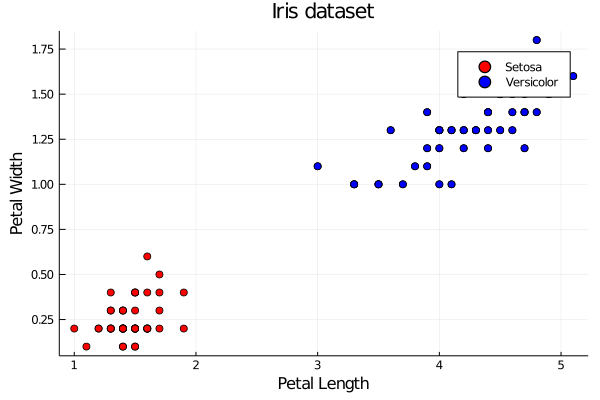

In [126]:
x_data2 = [x for x in zip(iris.PetalLength[1:100], iris.PetalWidth[1:100])]
y_data2 = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

#plot 
scatter(x_data2[1:100], 
    label = "Setosa", 
    xaxis = "Petal Length", 
    yaxis = "Petal Width", 
    color = "red",
    title = "Iris dataset")

scatter!(x_data2[51:100],
    color = "blue",
    label = "Versicolor")

In [127]:
w2 = PLA(x_data2, y_data2; epochs = 10000)

3-element Array{Float64,1}:
  6.143140205499554 
 -1.8702338357053252
 -3.4018074486753984

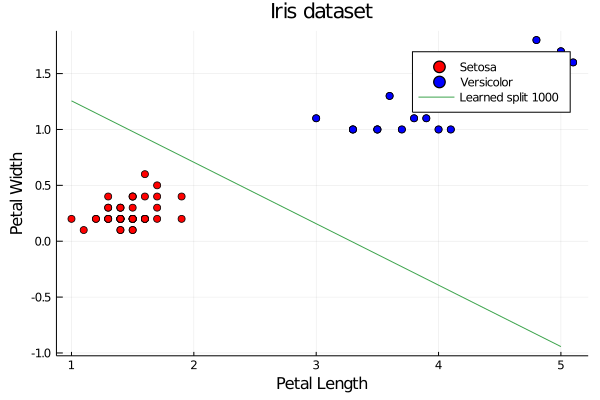

In [128]:
plot!([(x,(-w2[2]*x - w2[1]) / w2[3]) for x = 1:5],
        label = "Learned split 1000")

In [129]:
function predictor(weights, x)
    return sign(weights, x) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

In [130]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.PetalLength[k], iris.PetalWidth[k])))

Flower #26
The true label is: setosa
The predicted label is: setosa


In [131]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.PetalLength[k], iris.PetalWidth[k])))

Flower #99
The true label is: versicolor
The predicted label is: versicolor


In [132]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.PetalLength[k], iris.PetalWidth[k])))

Flower #3
The true label is: setosa
The predicted label is: setosa
